In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')


print(df.head())

print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


In [6]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['cntry'])

#Convert categorical variable into dummy/indicator variables

# Nordic countries dummy.
features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


In [7]:
features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

# Check to make sure it worked.
print(df['agea'].groupby(features['Adult_65plus']).describe())

               count       mean        std   min   25%   50%   75%    max
Adult_65plus                                                             
0             6682.0  40.874738  13.958596  15.0  29.0  42.0  53.0   64.0
1             1673.0  73.815302   6.650086  65.0  69.0  72.0  78.0  114.0



Group Adminstrative variables; country, identifications numbers, editions. Automatically included in data file.

Name

Label

Question

cntry

Country

All rounds: Country

year

ESS round

All rounds: ESS round

idno

Respondent's identification number

All rounds: Respondent's identification number



tvtot

TV watching, total time on average weekday

All rounds: On an average weekday, how much time, in total, do you spend watching television?

ppltrst

Most people can be trusted or you can't be too careful

All rounds: Using this card, generally speaking, would you say that most people can be trusted, or that you can't be too careful in dealing with people? Please tell me on a score of 0 to 10, where 0 means you can't be too careful and 10 means that most people can be trusted.

pplfair

Most people try to take advantage of you, or try to be fair

All rounds: Using this card, do you think that most people would try to take advantage of you if they got the chance, or would they try to be fair?

pplhlp

Most of the time people helpful or mostly looking out for themselves

All rounds: Would you say that most of the time people try to be helpful or that they are mostly looking out for themselves?


happy

How happy are you

All rounds: Taking all things together, how happy would you say you are?

sclmeet

How often socially meet with friends, relatives or colleagues

All rounds: Using this card, how often do you meet socially with friends, relatives or work colleagues?

sclact

Take part in social activities compared to others of same age

All rounds: Compared to other people of your age, how often would you say you take part in social activities ?


gndr

Gender

All rounds: CODE SEX, respondent

agea

Age of respondent, calculated

All rounds: Age of respondent, calculated


partner

Lives with husband/wife/partner at household grid

All rounds: INTERVIEWER CODE:

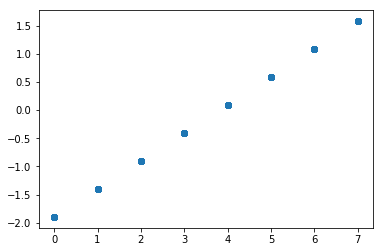

               idno          year         tvtot       ppltrst       pplfair  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -6.977221e-18 -5.302688e-16 -5.930638e-17 -8.372665e-17  1.814077e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00   
min   -6.364414e-02 -1.000614e+00 -1.900914e+00 -2.516209e+00 -2.832624e+00   
25%   -6.196385e-02 -1.000614e+00 -9.053021e-01 -7.108364e-01 -4.741304e-01   
50%   -6.087847e-02  9.993865e-01  9.031023e-02  1.918499e-01 -2.431735e-03   
75%   -5.925039e-02  9.993865e-01  5.881164e-01  6.431931e-01  9.409657e-01   
max    1.734276e+01  9.993865e-01  1.583729e+00  1.997223e+00  1.884363e+00   

             pplhlp         happy       sclmeet        sclact          gndr  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -9.768109e-17  2.372255e-16 -1.116355e-16 -2.581572e-16  1.186128e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.

In [8]:
# If this is the first time you're using scikit-learn you'll first want to do
# pip install sklearn from your terminal to install the package.
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['tvtot'], df_scaled['tvtot'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

For example, perhaps watching more TV only makes people sad if they do it alone. People who live with a partner are probably less likely to watch TV alone. To represent the concept that people who live with a romantic partner don't get sad watching TV but people who don't live with a romantic partner do get sad, we can multiply our 'partner' indicator by the 'sadness' feature to create the interaction.

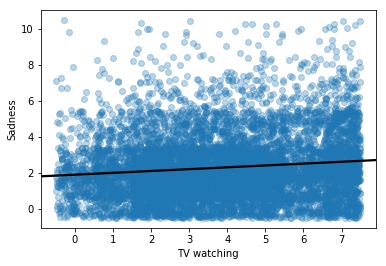

In [10]:
# Reverse-coding the 'happy' variable so that higher scores mean less
# happiness (and thus possibly more sadness).

features['Sadness'] = max(df['happy']) - df['happy']

sns.regplot(
    df['tvtot'],
    features['Sadness'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('TV watching')
plt.ylabel('Sadness')
plt.show()

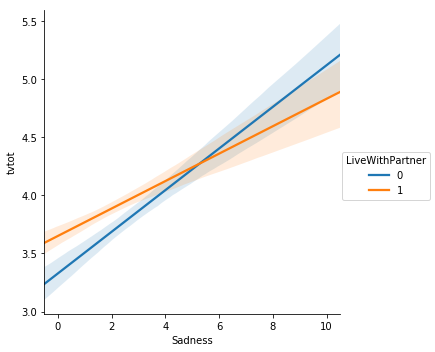

In [11]:
# Create a better indicator for 'partner.' Currently it is coded 1 for
# living with a partner and 2 for not living with a partner.
features['LiveWithPartner'] = np.where(df['partner'] == 1, 1, 0)

# Create the interaction.
features['Sad_Partner'] = features['Sadness'] * features['LiveWithPartner']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['tvtot'] = df['tvtot']
sns.lmplot(
    x='Sadness',
    y='tvtot',
    hue='LiveWithPartner',
    data=features,
    scatter=False
)
plt.show()

cntry - categorical
year - n/a
idno - n/a
tvtot - continuous
ppltrst - continuous, interval 
pplfair - continuous, interval 
pplhlp - continuous,  interval
happy - continuous, interval
sclmeet - continuous, ordinal
sclact - continuous, ordinal
gndr - categorical
agea - continuous, ratio
partner - categorical